In [214]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
pp = pprint.PrettyPrinter(indent =4)

In [4]:
#Reading the 6 files, 2 from each category into pandas dataframe
Delta_top10_rise_skin = pd.read_csv('Delta_top10_rise_skin.csv')
Delta_last10_drop_skin = pd.read_csv('Delta_last10_drop_skin.csv')
Delta_top10_rise_hair = pd.read_csv('Delta_top10_rise_hair.csv')
Delta_last10_drop_hair = pd.read_csv('Delta_last10_drop_hair.csv')
Delta_top10_rise_makeup = pd.read_csv('Delta_top10_rise_makeup.csv')
Delta_last10_drop_makeup = pd.read_csv('Delta_last10_drop_makeup.csv')

In [5]:
Delta_top10_rise_skin.head(2)

asin  helpful  Not helpful  \
0  B000RGBWPO      1.7          2.0   
1  B001E96N48      0.4          0.6   

                                       review_concat  \
0  used cocoa butter never allergic stuff gave ho...   
1  really oily skin saw soap mentioned dr oz deci...   

                                      summary_concat  overall rating  \
0  allergic like wonderful dry skin smell fantast...               1   
1  love love love face made face dry peel ok bad ...               1   

                                                name   category  \
0  Palmer's Cocoa Butter Formula Daily Skin Thera...  Skin Care   
1  Neutrogena The Transparent Facial Bar Original...  Skin Care   

                                         description  price  rating  \
0  Special Ingredients\n\n\nCocoa Butter, Vitamin...   6.64     4.8   
1  Item Form\n\n\nBar\n\n\n\n\nBrand\n\n\nNeutrog...  24.45     4.8   

   No_of_Rating  Delta  
0         13330    3.8  
1           217    3.8

In [126]:
Delta_last10_drop_skin.head(2)

asin  helpful  Not helpful  \
0  B00EQBYSH0      1.5          4.0   
1  B00604MSSC      0.7          1.7   

                                       review_concat  \
0  indian ginseng cellulite cream amazing work wo...   
1  I using body wash two week caused horrible bre...   

                                      summary_concat  overall rating  \
0  amazing read ingredient lid flavor work natura...               5   
1  horrible breakout really itchy skin nice produ...               5   

                                                name   category  \
0  Moroccan Mint Scented Anti Cellulite Cream, 4 ...  Skin Care   
1  Dove, Crème Mousse Body Wash, Rich and Creamy,...  Skin Care   

                                         description  price  rating  \
0  Item Form\n\n\nCream\n\n\n\n\nBrand\n\n\nDiva ...  10.99     3.4   
1  Item Form\n\n\nMousse\n\n\n\n\nBrand\n\n\nDove...  76.99     3.5   

   No_of_Rating  Delta  
0            34   -1.6  
1            54   -1.5

##Scraping the current reviews for these products


In [9]:
from bs4 import BeautifulSoup
from requests import get
import requests

from selenium import webdriver


In [10]:
#Top 10 skincare product that improved ratings in 6 years
#Using the asin for scraping
asin_improve_skin = list(Delta_top10_rise_skin['asin'])

In [14]:
len(asin_improve_skin)
#There are 10 asins in the list

10

In [90]:
#scraping reviews for each of these asins
#Starting webdriver
driver = webdriver.Chrome(executable_path="/Users/agarai/Desktop/Sweta-Data_Science/git/Amazon_Web_Scraping/chromedriver")
driver.get(f'https://www.amazon.com/gp/product/B000RGBWPO')

product_review = {}

#Start looping through the 10 asins
for i in asin_improve_skin:  
    
    # Print the urls at the beginning of each loop 
    print(f'https://www.amazon.com/gp/product/{i}')
    
    # Send webdriver to the url in the loop
    driver.get(f'https://www.amazon.com/gp/product/{i}')
    
    # Instantiate BeautifulSoup web scraper 
    soup = BeautifulSoup(driver.page_source, 'lxml')
    
    # Create an empty dictionary for each product with asin number i
    review_list = []
    review_widget = soup.find('div', {'data-hook':'top-customer-reviews-widget'})
    reviews = review_widget.findAll('div',{'data-hook':'review'})
    number_of_top_reviews = len(reviews)
    print("Number of reviews ", number_of_top_reviews)
#     review = reviews.findAll('div',{'data-hook':'review-collapsed'})
#     pp.pprint(review)
    
    for j in range(number_of_top_reviews):
#         print("Success")
        review_collap = reviews[j].findAll('div',{'data-hook':'review-collapsed'})
        review = review_collap[0].find('span').text.strip()
        review_list.append(review)
        
#         break
#     print("Length ",len(review_list))
    product_review[i] = review_list
    
#     break
pp.pprint(product_review)

In [80]:
#scraping reviews for each of these asins
def scrap_rev(lis):
    
    
    #Starting webdriver
    driver = webdriver.Chrome(executable_path="/Users/agarai/Desktop/Sweta-Data_Science/git/Amazon_Web_Scraping/chromedriver")


    dic = {}

    #Start looping through the 10 asins
    for i in lis:  

        # Print the urls at the beginning of each loop 
        print(f'https://www.amazon.com/gp/product/{i}')

        # Send webdriver to the url in the loop
        driver.get(f'https://www.amazon.com/gp/product/{i}')

        # Instantiate BeautifulSoup web scraper 
        soup = BeautifulSoup(driver.page_source, 'lxml')

        # Create an empty dictionary for each product with asin number i
        review_list = []
        review_widget = soup.find('div', {'data-hook':'top-customer-reviews-widget'})
        reviews = review_widget.findAll('div',{'data-hook':'review'})
        number_of_top_reviews = len(reviews)
        print("Number of reviews ", number_of_top_reviews)
  

        for j in range(number_of_top_reviews):
            review_collap = reviews[j].findAll('div',{'data-hook':'review-collapsed'})
            review = review_collap[0].find('span').text.strip()
            review_list.append(review)

   
        dic[i] = review_list
    return dic

 


In [66]:
#Creating the rest of list from dataframes
#Using the asin for scraping
asin_drop_skin = list(Delta_last10_drop_skin['asin'])
asin_improve_hair = list(Delta_top10_rise_hair['asin'])
asin_drop_hair = list(Delta_last10_drop_hair['asin'])
asin_improve_makeup = list(Delta_top10_rise_makeup['asin'])
asin_drop_makeup = list(Delta_last10_drop_makeup['asin'])

In [89]:
#Using the scraping function to scrape through rest of the lists
#asin_drop_skin
#asin_drop_skin_dic = scrap_rev(asin_drop_skin)

In [92]:
asin_improve_skin_dic = scrap_rev(asin_improve_skin)

<ipython-input-80-9d5492b4e2c5>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="/Users/agarai/Desktop/Sweta-Data_Science/git/Amazon_Web_Scraping/chromedriver")


https://www.amazon.com/gp/product/B000RGBWPO
Number of reviews  8
https://www.amazon.com/gp/product/B001E96N48
Number of reviews  8
https://www.amazon.com/gp/product/B001FYXA6G
Number of reviews  4
https://www.amazon.com/gp/product/B002FJ11UW
Number of reviews  8
https://www.amazon.com/gp/product/B002CML1XE
Number of reviews  6
https://www.amazon.com/gp/product/B00AAR9I60
Number of reviews  8
https://www.amazon.com/gp/product/B001ET78RE
Number of reviews  8
https://www.amazon.com/gp/product/B00006FRW7
Number of reviews  3
https://www.amazon.com/gp/product/B001F51T3Q
Number of reviews  8
https://www.amazon.com/gp/product/B000F7UUHQ
Number of reviews  6


In [88]:
#Rest 5 of the list
asin_drop_skin_dic = scrap_rev(asin_drop_skin)
asin_improve_hair_dic = scrap_rev(asin_improve_hair)
asin_drop_hair_dic = scrap_rev(asin_drop_hair)
asin_improve_makeup_dic = scrap_rev(asin_improve_makeup)
asin_drop_makeup_dic = scrap_rev(asin_drop_makeup)


In [141]:
def convert_to_df(dic):    
    lis = []
    for k,v in dic.items():
        temp_dic ={}
        temp_dic['asin']=k
        temp_dic['review_2021'] = ' '.join(v)
        lis.append(temp_dic)
        df = pd.DataFrame(lis)
    return df
    #pp.pprint(asin_improve_skin_lis)


In [143]:
asin_improve_skin_df = convert_to_df(asin_improve_skin_dic)

In [154]:
asin_improve_skin_df.head(5)

asin                                        review_2021
0  B000RGBWPO  I had knee surgery on the 13th of Sept 2019.  ...
1  B001E96N48  Lasts as long as a regular bar of soap, pleasa...
2  B001FYXA6G  Have you looked at the price on this stuff? DO...
3  B002FJ11UW  I'll start off by saying that I genuinely hate...
4  B002CML1XE  Before you buy, just know this: All the raves ...

In [145]:
asin_drop_skin_df = convert_to_df(asin_drop_skin_dic)
asin_improve_hair_df = convert_to_df(asin_improve_hair_dic)
asin_drop_hair_df = convert_to_df(asin_drop_hair_dic)
asin_improve_makeup_df = convert_to_df(asin_improve_makeup_dic)
asin_drop_makeup_df = convert_to_df(asin_drop_makeup_dic)

In [148]:
#I will now merge these dataframes to my existing dataframes for each category and then clean the data for sentiment analysis
#Delta_top10_rise_skin merged with asin_improve_skin_df 

skincare_improved = pd.merge(Delta_top10_rise_skin, asin_improve_skin_df, how ='inner', on ='asin')
skincare_dropped = pd.merge(Delta_last10_drop_skin, asin_drop_skin_df, how ='inner', on ='asin')

haircare_improved = pd.merge(Delta_top10_rise_hair, asin_improve_hair_df, how ='inner', on ='asin')
haircare_dropped = pd.merge(Delta_last10_drop_hair, asin_drop_hair_df, how ='inner', on ='asin')

makeup_improved = pd.merge(Delta_top10_rise_makeup, asin_improve_makeup_df, how ='inner', on ='asin')
makeup_dropped = pd.merge(Delta_last10_drop_makeup, asin_drop_makeup_df, how ='inner', on ='asin')


In [156]:
skincare_improved.head(1)

asin  helpful  Not helpful  \
0  B000RGBWPO      1.7          2.0   

                                       review_concat  \
0  used cocoa butter never allergic stuff gave ho...   

                                      summary_concat  overall rating  \
0  allergic like wonderful dry skin smell fantast...               1   

                                                name   category  \
0  Palmer's Cocoa Butter Formula Daily Skin Thera...  Skin Care   

                                         description  price  rating  \
0  Special Ingredients\n\n\nCocoa Butter, Vitamin...   6.64     4.8   

   No_of_Rating  Delta                                        review_2021  
0         13330    3.8  I had knee surgery on the 13th of Sept 2019.  ...

In [157]:
skincare_dropped.head(1)

asin  helpful  Not helpful  \
0  B00EQBYSH0      1.5          4.0   

                                       review_concat  \
0  indian ginseng cellulite cream amazing work wo...   

                                      summary_concat  overall rating  \
0  amazing read ingredient lid flavor work natura...               5   

                                                name   category  \
0  Moroccan Mint Scented Anti Cellulite Cream, 4 ...  Skin Care   

                                         description  price  rating  \
0  Item Form\n\n\nCream\n\n\n\n\nBrand\n\n\nDiva ...  10.99     3.4   

   No_of_Rating  Delta                                        review_2021  
0            34   -1.6  I was so pleasantly surprised when I received ...

In [158]:
haircare_improved.head(1)

asin  helpful  Not helpful  \
0  B003JA3KDW      0.7          1.1   

                                       review_concat  \
0  pantenes product tend colorcoded red curly hai...   

                                      summary_concat  overall rating  \
0  not check name sure getting great even pantene...               1   

                                                name   category  \
0  Pantene Pro-V Curl Perfection Conditioner, 12 ...  Hair Care   

                                         description  price  rating  \
0  Brand\n\n\nPantene\n\n\n\n\nHair Type\n\n\nCur...  23.94     4.8   

   No_of_Rating  Delta                                        review_2021  
0           317    3.8  I loyally used the product for approximately a...

In [159]:
haircare_dropped.head(1)

asin  helpful  Not helpful  \
0  B002KAGWYQ      1.1          1.6   

                                       review_concat  \
0  overall happy purchase however r6 not dark ant...   

                                      summary_concat  overall rating  \
0  rockn ponytail perfect match not fabulous fake...               5   

                                             name   category  \
0  Hairdo Simply Straight Pony, R6 Dark Chocolate  Hair Care   

                                         description  price  rating  \
0  Color\n\n\nR6 Dark Chocolate\n\n\n\n\nBrand\n\...   38.0     3.0   

   No_of_Rating  Delta                                        review_2021  
0            17   -2.0  Overall I am happy with my purchase. However, ...

In [160]:
makeup_improved.head(1)

asin  helpful  Not helpful  \
0  B005O54SVS      1.2          1.9   

                                       review_concat  \
0  honestly wanted love stuff I seeing product lo...   

                                      summary_concat  overall rating  \
0  not see fuss shrink pore love good primer love...               1   

                                                name category  \
0  Photo Finish Foundation Primer by Smashbox for...   Makeup   

                                         description  price  rating  \
0  Brand\n\n\nSmashbox\n\n\n\n\nIngredients\n\n\n...   29.0     4.7   

   No_of_Rating  Delta                                        review_2021  
0          1464    3.7  Beware: If you order this thinking you'll get ...

In [177]:
makeup_dropped.head(1)

asin  helpful  Not helpful  \
0  B002R278YA      0.0          0.0   

                                       review_concat  \
0  lip liner pencil arrived brand new perfect con...   

                                      summary_concat  overall rating  \
0  excellent quality simple cute thumb smooth mov...               5   

                                          name category  \
0  NYX Slim Lip Liner Pencil - Latte - SLP 847   Makeup   

                                         description  price  rating  \
0  Brand\n\n\nPROFESSIONALNYXMAKEUP\n\n\n\n\nItem...   5.99     2.8   

   No_of_Rating  Delta                                        review_2021  
0            35   -2.2  ordered hot pink came prompt happy however 2nd...

# Preprocessing the new reviews

1. convert all text to lower case
2. Replace empty spaces with one space
3. Expand Contraction, this will expand the short form of words (eg: havent to not)
4. Filtering punctuation as it does not add any value to NLP
4. Filtering stopwords
6. Expand Contraction, this will expand the short form of words (eg: mgmnt to management)
7. Lemmetization: To find the root words

In [165]:
import re 

In [162]:
#converting to lowercase
skincare_improved['review_2021'] = skincare_improved['review_2021'].str.lower()
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].str.lower()
haircare_improved['review_2021'] = haircare_improved['review_2021'].str.lower()
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].str.lower()
makeup_improved['review_2021'] = makeup_improved['review_2021'].str.lower()
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].str.lower()

In [166]:
#Replace empty spaces with one space
skincare_improved['review_2021'] = skincare_improved['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))
haircare_improved['review_2021'] = haircare_improved['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))
makeup_improved['review_2021'] = makeup_improved['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))


In [170]:
#Expand Contraction
import contractions
skincare_improved['review_2021'] = skincare_improved['review_2021'].apply(lambda x: contractions.fix(x))
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].apply(lambda x: contractions.fix(x))
haircare_improved['review_2021'] = haircare_improved['review_2021'].apply(lambda x: contractions.fix(x))
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].apply(lambda x: contractions.fix(x))
makeup_improved['review_2021'] = makeup_improved['review_2021'].apply(lambda x: contractions.fix(x))
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].apply(lambda x: contractions.fix(x))

In [171]:
#Filtering punctuation
skincare_improved['review_2021'] = skincare_improved['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))
haircare_improved['review_2021'] = haircare_improved['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))
makeup_improved['review_2021'] = makeup_improved['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))


In [175]:
#Filtering stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
#We want to differentiate between not impressed and impressed. No and not are stopwords but we dnt want to remove
# them from our text. I will remove no and not from stop words
stop.remove('no')
stop.remove('not')

skincare_improved['review_2021'] = skincare_improved['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
haircare_improved['review_2021'] = haircare_improved['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
makeup_improved['review_2021'] = makeup_improved['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))



In [176]:
#Lemmetization
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()

skincare_improved['review_2021'] = skincare_improved['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
haircare_improved['review_2021'] = haircare_improved['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
makeup_improved['review_2021'] = makeup_improved['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))



# Sentiment Analysis

In [182]:
from wordcloud import WordCloud
from textblob import TextBlob

In [205]:
def extract_ngrams(data):
    n_grams = TextBlob(data).ngrams(2)
    return [ '_'.join(grams) for grams in n_grams]

## For improved Rating (Skin Products)

In [217]:
#Analysis of 2014 Review
skincare_improved['review_concat_2014_2N'] = skincare_improved['review_concat'].apply(lambda data: extract_ngrams(data))
skincare_improved['review_concat_2014_2N'] = skincare_improved['review_concat_2014_2N'].apply(lambda x:' '.join(x))


(-0.5, 799.5, 399.5, -0.5)

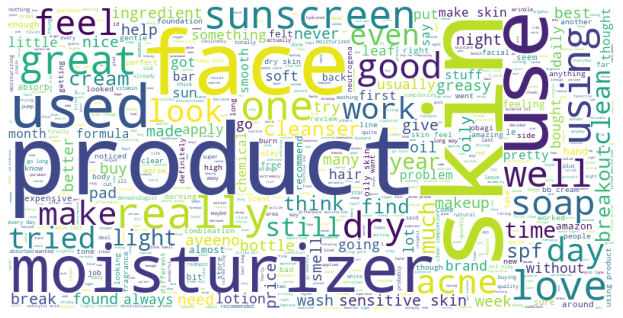

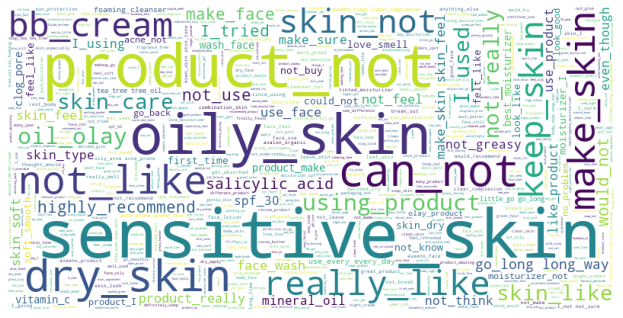

In [274]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(skincare_improved['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(skincare_improved['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')


In [275]:
#Analysis of 2021 Review
skincare_improved['review_2021_2N'] = skincare_improved['review_2021'].apply(lambda data: extract_ngrams(data))
skincare_improved['review_2021_2N'] = skincare_improved['review_2021_2N'].apply(lambda x:' '.join(x))

(-0.5, 799.5, 399.5, -0.5)

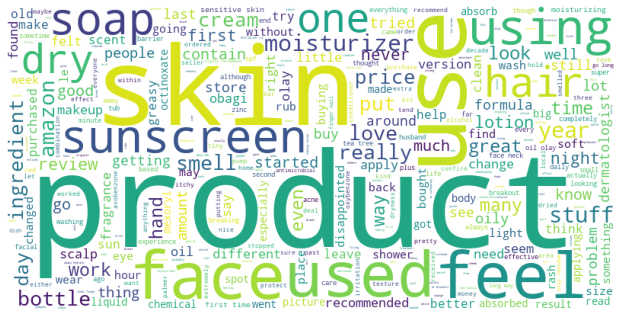

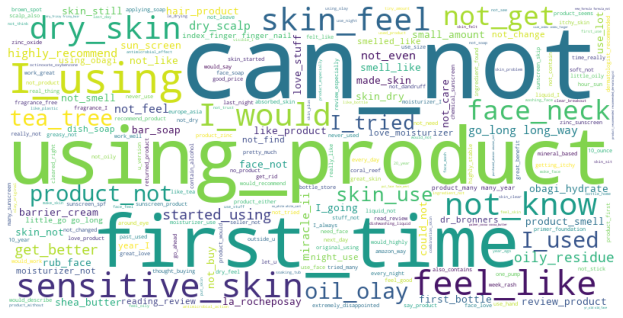

In [276]:
#Generate wordcloud for 2021 skin product
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(skincare_improved['review_2021']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(skincare_improved['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

## For dropped Rating (Skin Products)

In [222]:
#Analysis of 2014 Review
skincare_dropped['review_concat_2014_2N'] = skincare_dropped['review_concat'].apply(lambda data: extract_ngrams(data))
skincare_dropped['review_concat_2014_2N'] = skincare_dropped['review_concat_2014_2N'].apply(lambda x:' '.join(x))


(-0.5, 799.5, 399.5, -0.5)

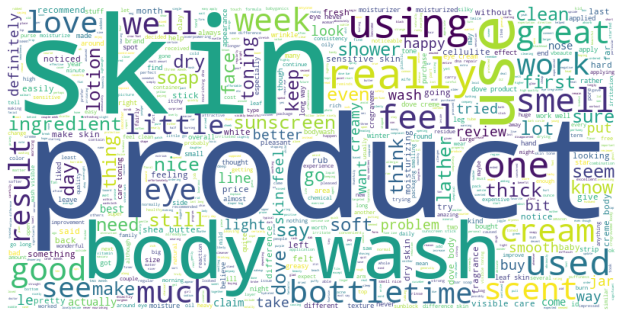

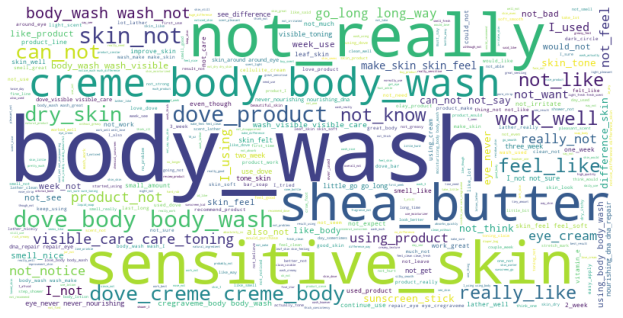

In [277]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(skincare_dropped['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(skincare_dropped['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [ ]:
#Analysis of 2021 Review
skincare_dropped['review_2021_2N'] = skincare_dropped['review_2021'].apply(lambda data: extract_ngrams(data))
skincare_dropped['review_2021_2N'] = skincare_dropped['review_2021_2N'].apply(lambda x:' '.join(x))

(-0.5, 799.5, 399.5, -0.5)

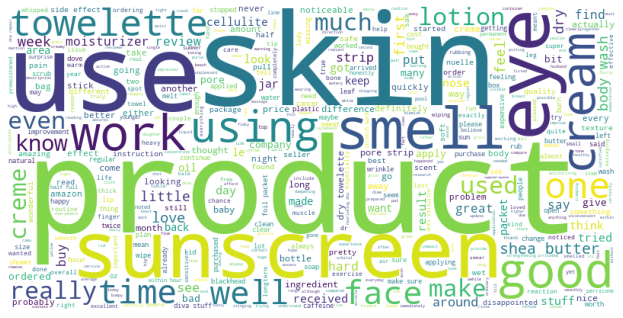

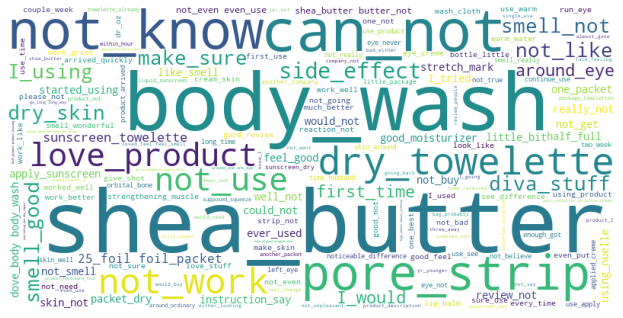

In [278]:
#Generate wordcloud for 2021 skin product
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(skincare_dropped['review_2021']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(skincare_dropped['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

## For improved hair products 

In [234]:
#Analysis of 2014 Review
haircare_improved['review_concat_2014_2N'] = haircare_improved['review_concat'].apply(lambda data: extract_ngrams(data))
haircare_improved['review_concat_2014_2N'] = haircare_improved['review_concat_2014_2N'].apply(lambda x:' '.join(x))


(-0.5, 799.5, 399.5, -0.5)

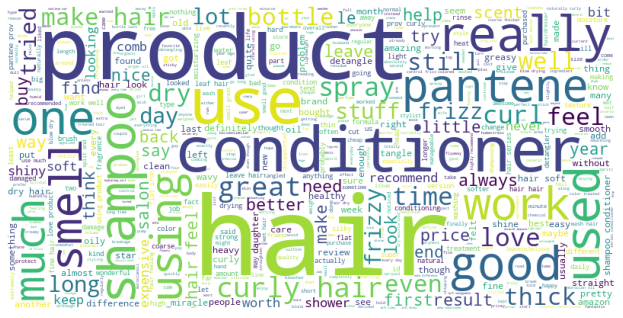

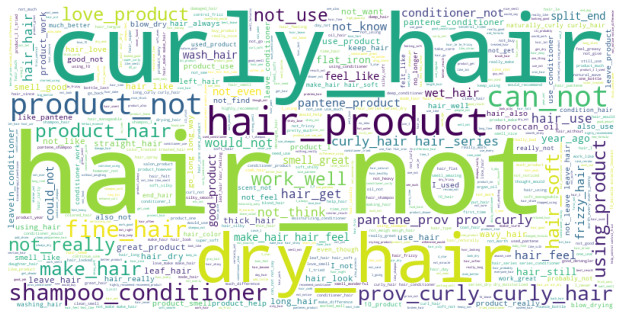

In [279]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(haircare_improved['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(haircare_improved['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [280]:
#Analysis of 2021 Review
haircare_improved['review_2021_2N'] = haircare_improved['review_2021'].apply(lambda data: extract_ngrams(data))
haircare_improved['review_2021_2N'] = haircare_improved['review_2021_2N'].apply(lambda x:' '.join(x))

(-0.5, 799.5, 399.5, -0.5)

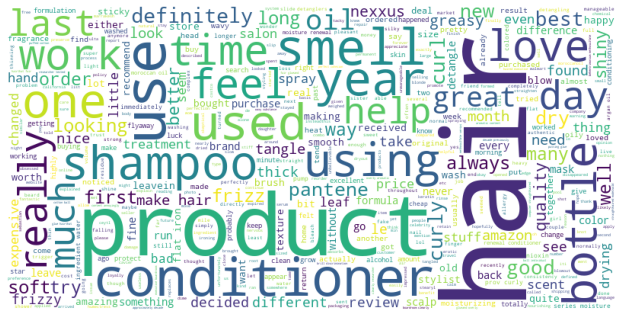

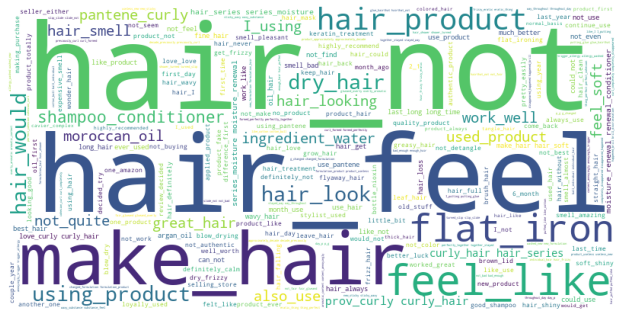

In [282]:
#Generate wordcloud for 2021 haircare product
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(haircare_improved['review_2021']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(haircare_improved['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

## For dropped hair products

In [245]:
#Analysis of 2014 Review
haircare_dropped['review_concat_2014_2N'] = haircare_dropped['review_concat'].apply(lambda data: extract_ngrams(data))
haircare_dropped['review_concat_2014_2N'] = haircare_dropped['review_concat_2014_2N'].apply(lambda x:' '.join(x))


(-0.5, 799.5, 399.5, -0.5)

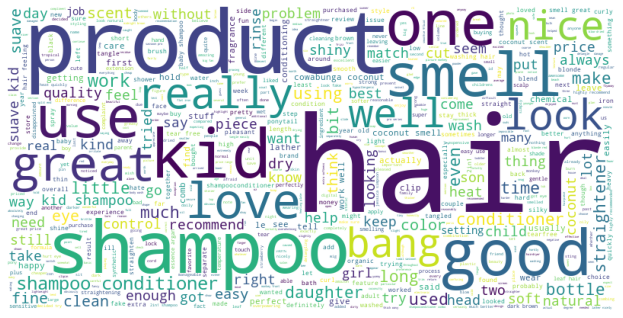

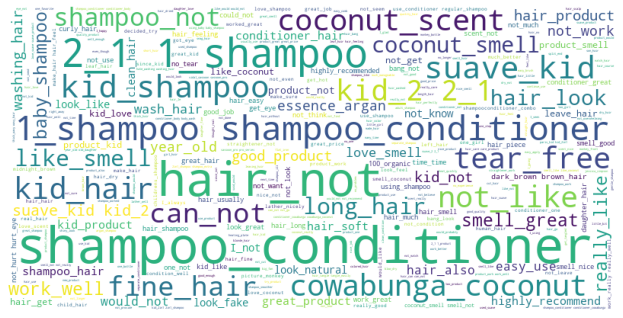

In [283]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(haircare_dropped['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(haircare_dropped['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [248]:
#Analysis of 2021 Review
haircare_dropped['review_2021_2N'] = haircare_dropped['review_2021'].apply(lambda data: extract_ngrams(data))
haircare_dropped['review_2021_2N'] = haircare_dropped['review_2021_2N'].apply(lambda x:' '.join(x))


(-0.5, 799.5, 399.5, -0.5)

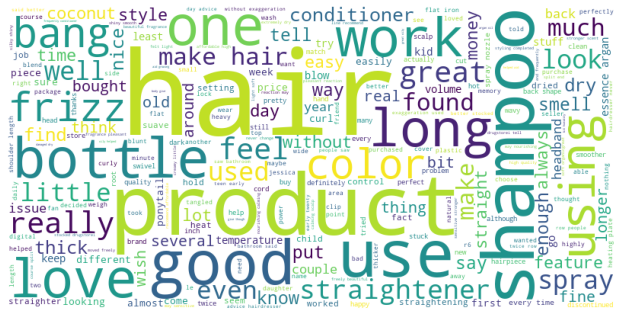

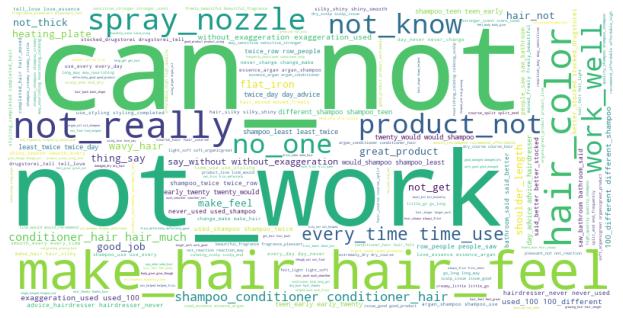

In [284]:
#Generate wordcloud for 2021 haircare product
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(haircare_dropped['review_2021']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(haircare_dropped['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

## For improved makeup products 

In [251]:
#Analysis of 2014 Review
makeup_improved['review_concat_2014_2N'] = makeup_improved['review_concat'].apply(lambda data: extract_ngrams(data))
makeup_improved['review_concat_2014_2N'] = makeup_improved['review_concat_2014_2N'].apply(lambda x:' '.join(x))


(-0.5, 799.5, 399.5, -0.5)

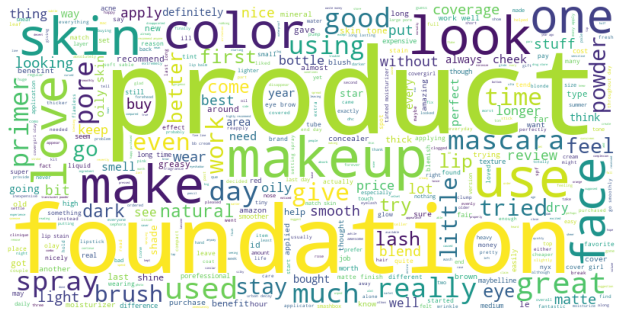

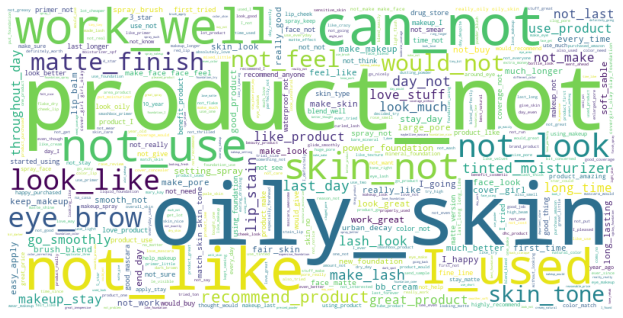

In [285]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(makeup_improved['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(makeup_improved['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [287]:
#Analysis of 2021 Review
makeup_improved['review_2021_2N'] = makeup_improved['review_2021'].apply(lambda data: extract_ngrams(data))
makeup_improved['review_2021_2N'] = makeup_improved['review_2021_2N'].apply(lambda x:' '.join(x))


(-0.5, 799.5, 399.5, -0.5)

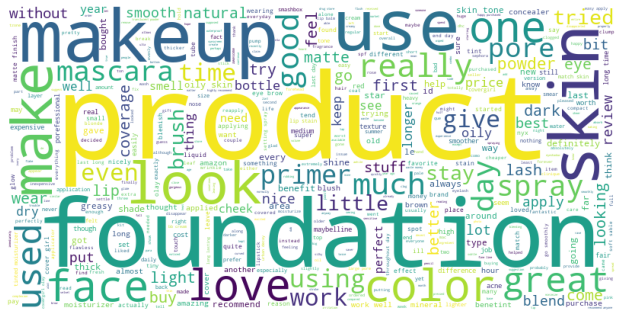

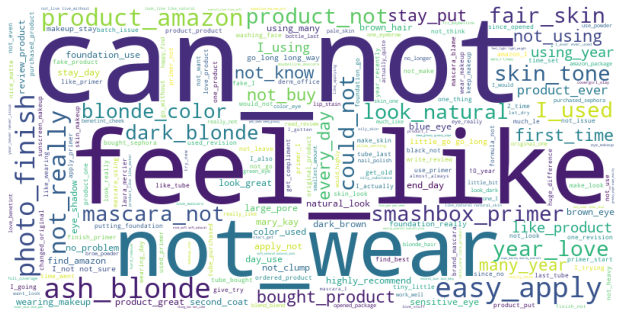

In [289]:
#Generate wordcloud for 2021
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(makeup_improved['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(makeup_improved['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

## For dropped makup products 

In [257]:
#Analysis of 2014 Review
makeup_dropped['review_concat_2014_2N'] = makeup_dropped['review_concat'].apply(lambda data: extract_ngrams(data))
makeup_dropped['review_concat_2014_2N'] = makeup_dropped['review_concat_2014_2N'].apply(lambda x:' '.join(x))


(-0.5, 799.5, 399.5, -0.5)

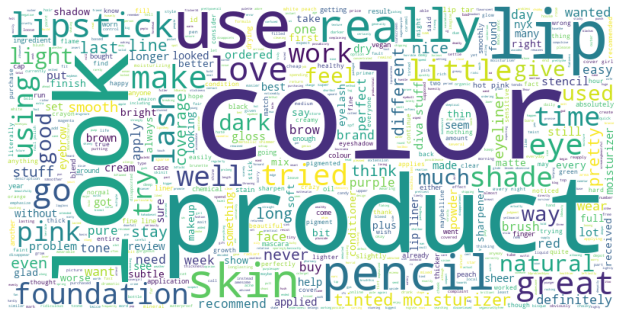

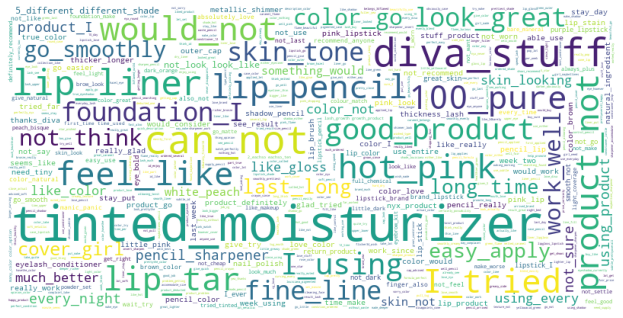

In [290]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(makeup_dropped['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(makeup_dropped['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [260]:
#Analysis of 2021 Review
makeup_dropped['review_2021_2N'] = makeup_dropped['review_2021'].apply(lambda data: extract_ngrams(data))
makeup_dropped['review_2021_2N'] = makeup_dropped['review_2021_2N'].apply(lambda x:' '.join(x))


(-0.5, 799.5, 399.5, -0.5)

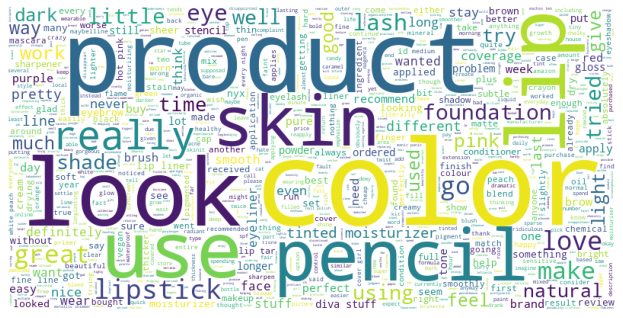

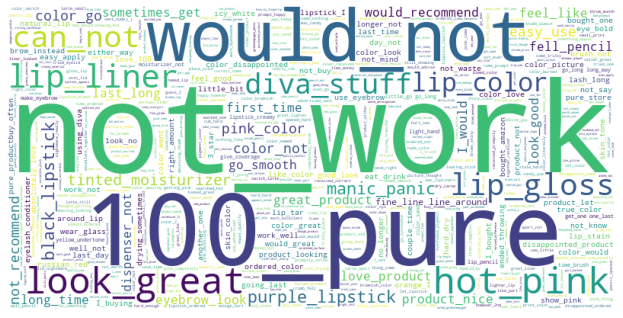

In [291]:
#Generate wordcloud for 2021
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(makeup_dropped['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(makeup_dropped['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')